In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1 = raw_data.copy()
df1 = df1.drop(['area_type','availability','society','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Check for missing values

In [4]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df1.shape

(13320, 5)

In [6]:
df2 = df1.dropna(axis=0)

In [7]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

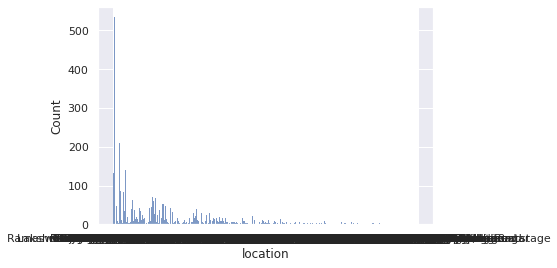

In [10]:
sns.histplot(df2['location'])

### Feature engineering on size column

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
def get_numeric_size(x):
    result = x.split(' ')[0]
    return int(result)

In [13]:
df3 = df2.copy()
df3['size'] = df3['size'].apply(get_numeric_size)                      #(lambda x: int(x.split(' ')[0]))

In [14]:
df3['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3[df3['size']>15]

,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
3379,1Hanuman Nagar,19,2000,16.0,490.0
3609,Koramangala Industrial Layout,16,10000,16.0,550.0
4684,Munnekollal,43,2400,40.0,660.0
11559,1Kasavanhalli,18,1200,18.0,200.0


### Feature Engineering on total_sqft

In [16]:
df4 = df3.copy()

In [17]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [19]:
df4[df4['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [20]:
def average_on_range(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df4['total_sqft'] = df4['total_sqft'].apply(average_on_range)

In [22]:
average_on_range('1000 - 1285')

1142.5

In [23]:
average_on_range('5.31Acres')

### Accessing 990 and 1019 index

In [24]:
df4.loc[1019]

location      Marathi Layout
size                       1
total_sqft               NaN
bath                       1
price                    110
Name: 1019, dtype: object

# Feature Engineering

## Adding per_sqft column

In [25]:
df5 = df4.copy()
df5['per_sqft'] = df4['price']*100000/df4['total_sqft']

In [26]:
df5.head(10)

,location,size,total_sqft,bath,price,per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,36274.509804


In [27]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df5['location'].unique())

1304

## Dimentionality Reduction by other

In [29]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [30]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Chandra Layout        9
Jakkur Plantation     9
2nd Phase JP Nagar    9
Yemlur                9
Mathikere             9
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1039, dtype: int64

In [31]:
df5['location'] = df5['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

255

In [32]:
df5.tail(15)

,location,size,total_sqft,bath,price,per_sqft
13305,Hulimavu,1,500.0,1.0,220.00,44000.000000
13306,other,4,1200.0,5.0,325.00,27083.333333
13307,Billekahalli,3,1805.0,3.0,134.00,7423.822715
13308,Bannerghatta Road,3,1527.0,3.0,142.00,9299.279633
13309,Yeshwanthpur,3,1675.0,3.0,92.13,5500.298507
13310,Rachenahalli,2,1050.0,2.0,52.71,5020.000000
13311,Ramamurthy Nagar,7,1500.0,9.0,250.00,16666.666667
13312,Bellandur,2,1262.0,2.0,47.00,3724.247227
13313,Uttarahalli,3,1345.0,2.0,57.00,4237.918216
13314,Green Glen Layout,3,1715.0,3.0,112.00,6530.612245


# Outlier detection and removal

In [33]:
df6 = df5.copy()
df6 = df6.rename(columns={'size': 'bhk'})
df6.head()

,location,bhk,total_sqft,bath,price,per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


#### Let's consider the threshold for minimum sqft for 1 bhk is 300.

In [34]:
df6[df6['total_sqft']/df6['bhk']<300].head()

,location,bhk,total_sqft,bath,price,per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000


In [35]:
len(df6[(df6['total_sqft']/df6['bhk'])>300])

12274

In [36]:
df6.shape

(13246, 6)

In [37]:
df7 = df6[(df6['total_sqft']/df6['bhk'])>300]

In [38]:
df7.shape

(12274, 6)

#### Check descriptions of price_per_sqft

In [39]:
df7['per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: per_sqft, dtype: float64

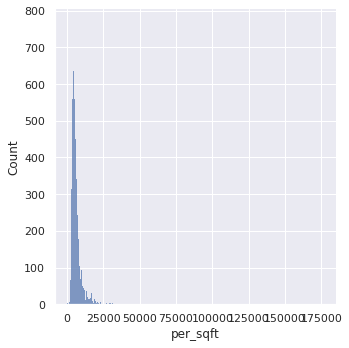

In [40]:
sns.displot(df7['per_sqft'])

In [41]:
'''def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.per_sqft)
        st = np.std(subdf.per_sqft)
        reduced_df = subdf[(subdf.per_sqft>(m-st)) & (subdf.per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)'''
q = df7['per_sqft'].quantile(.975)
df8 = df7[df7['per_sqft']<q]
q1 = df8['per_sqft'].quantile(.025)
df9 = df8[df8['per_sqft']>q1]
df9.shape

(11666, 6)

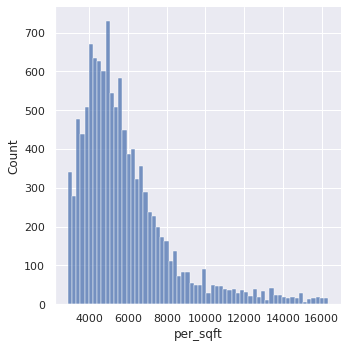

In [42]:
sns.displot(df9['per_sqft'])

#### Check number of bath 

In [43]:
df9[df9['bath']>df9['bhk']+2]

,location,bhk,total_sqft,bath,price,per_sqft
1078,BTM 1st Stage,9,3300.0,14.0,500.0,15151.515152
2620,other,6,11338.0,9.0,1000.0,8819.897689
7709,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
11366,Nagasandra,4,7000.0,8.0,450.0,6428.571429
12103,Thanisandra,3,1806.0,6.0,116.0,6423.034330


In [44]:
df10 = df9[df9['bath']<df9['bhk']+2]

In [45]:
df10.shape

(11542, 6)

In [46]:
bhk2 = df10[(df10['location']=='Thanisandra') & (df10['bhk']==2)]
bhk3 = df10[(df10['location']=='Thanisandra') & (df10['bhk']==3)]

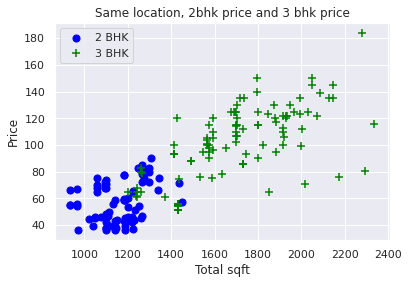

In [47]:
plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
plt.title('Same location, 2bhk price and 3 bhk price')
plt.xlabel('Total sqft')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sqft),
                'std': np.std(bhk_df.per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>4:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df11 = remove_bhk_outliers(df10)
# df8 = df7.copy()
df11.shape

(7880, 6)

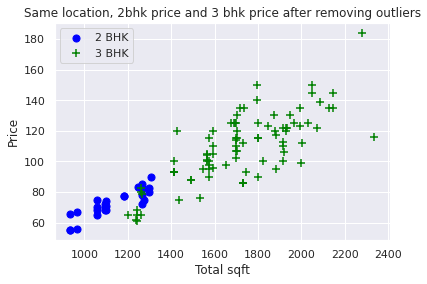

In [49]:
bhk2 = df11[(df11['location']=='Thanisandra') & (df11['bhk']==2)]
bhk3 = df11[(df11['location']=='Thanisandra') & (df11['bhk']==3)]

plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
plt.title('Same location, 2bhk price and 3 bhk price after removing outliers')
plt.xlabel('Total sqft')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
df11.head()

,location,bhk,total_sqft,bath,price,per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101


In [51]:
df12 = df11.drop(['per_sqft'],axis=1)

# Model Building

#### Create dummy varibales

In [52]:
df12.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
6,Old Airport Road,4,2732.0,4.0,204.00


In [53]:
df12.columns

Index(['location', 'bhk', 'total_sqft', 'bath', 'price'], dtype='object')

In [54]:
dummies = pd.get_dummies(df12['location'])

In [55]:
df13 = pd.concat([df12,dummies],axis=1)

In [56]:
data = df13.copy()

In [57]:
data.head()

,location,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2,1056.0,2.0,39.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,1440.0,2.0,62.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,1200.0,2.0,51.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,4,2732.0,4.0,204.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
data = data.drop(['location','other'],axis=1)

In [59]:
data.head()

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1056.0,2.0,39.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,62.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,95.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,51.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,2732.0,4.0,204.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
y = data['price']
x = data.drop(['price'],axis=1)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [63]:
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}

In [65]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, model_p in model_params.items():
    clf = GridSearchCV(model_p['model'],model_p['params'],cv=cv,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
result = pd.DataFrame(scores)
result

,model,best_score,best_params
0,linear_regression,0.798529,{'normalize': False}
1,lasso,0.747548,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.703875,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [66]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lr.score(x_test,y_test)

0.7959222872259977

In [68]:
def predict_price(location,sqft,bhk,bath):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = bhk
    z[1] = sqft
    z[2] = bath
    if loc_index >= 0:
        z[loc_index] = 1

    return lr.predict([z])[0]

In [69]:
x.columns

Index(['bhk', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [70]:
loc_index = np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

In [71]:
loc_index

6

In [72]:
predict_price('1st Phase JP Nagar',1000,3,3)

84.24744958515366

In [73]:
predict_price('Indira Nagar',1000,2,2)

123.46986901674167

In [74]:
predict_price('Indira Nagar',1000,2,2)

123.46986901674167

# Export the tested model to a pickle file

In [75]:
import pickle
with open('House_Price_Prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [76]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))